# 波浪頻譜分析

---
## FFT 基本原理
對於離散序列 $x[n], n=0,\ldots,N-1$，其離散傅立葉轉換(DFT)為：
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i 2\pi k n / N}, \quad k=0,\ldots,N-1
$$

FFT 是快速計算 DFT 的演算法，計算量約為 $O(N \log N)$，遠較直算 DFT 的 $O(N^2)$ 效率。

對實訊號進行 FFT 後，頻譜為對稱分佈，我們通常只取 0 到 $N/2$ 部分的頻率範圍。


---
## Python 實作範例

**實作步驟:**
1. 準備環境：安裝 Python (3.x)、NumPy、Matplotlib、SciPy。
2. 產生合成波浪訊號：兩組頻率 $f_1 = 0.2$ Hz 及 $f_2 = 0.5$ Hz，並加入隨機雜訊。
3. 使用 SciPy FFT 計算頻譜，繪製時間域與頻域圖並解讀結果。

**參數設定：**
- 採樣頻率 $f_s = 2\,Hz$, 即資料數據的時間間隔為 0.5 秒。
- 資料長度 $N=1024$，時間長度約 512 秒
- 訊號：$x(t) = \sin(2\pi f_1 t) + 0.5\sin(2\pi f_2 t) + 0.2\,\text{noise}$

In [1]:
# 產生模擬資料檔案 wave_data.txt
import numpy as np

# 設定隨機種子以利結果重現
np.random.seed(42)

# 基本參數設定
f_s = 2.0        # 採樣頻率 Hz
N = 1024         # 資料點數
t = np.arange(N)/f_s        # 時間軸

# 頻率成分
f1 = 0.2  # Hz
f2 = 0.5  # Hz

# 波浪訊號 = sin(2πf1 t) + 0.5 * sin(2πf2 t) + 雜訊
wave = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)
wave += 0.2*np.random.randn(N)  # 加入隨機雜訊

# 將數據存檔
np.savetxt('wave_data.txt', wave)
print("Data generated and saved to wave_data.txt")

Data generated and saved to wave_data.txt


**使用 SciPy FFT 的分析程式碼 (Python)**

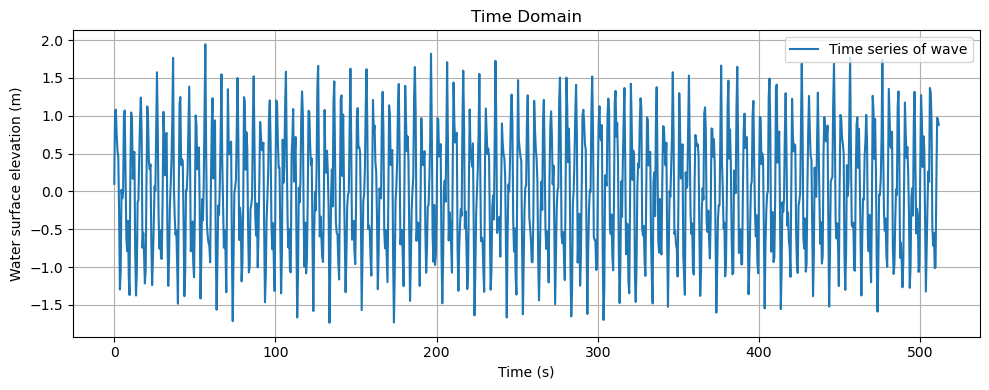

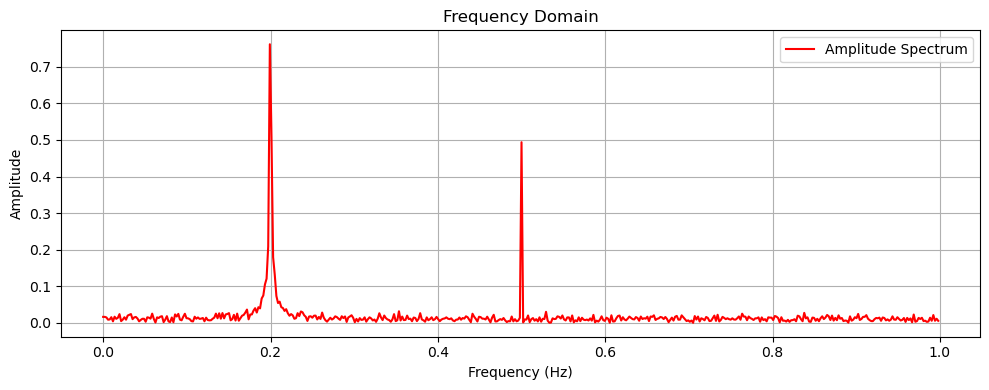

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 載入資料 (假設已經將 wave_data.txt 放在同一目錄)
wave = np.loadtxt('wave_data.txt')

# 基本參數
f_s = 2.0   # 採樣頻率 Hz
N = len(wave)
t = np.arange(N)/f_s

# 計算 FFT
Y = fft(wave)
# 頻率軸
freq = fftfreq(N, d=1/f_s)

# 取前半段頻率(因為對稱性)
half_N = N//2
freq_half = freq[:half_N]
Y_half = Y[:half_N]

# 計算振幅譜 (Amplitude Spectrum)
amplitude_spectrum = np.abs(Y_half)/(N/2) # 正規化，以便振幅代表每頻率成分的相對大小

# 時域圖
plt.figure(figsize=(10,4))
plt.plot(t, wave, label='Time series of wave')
plt.xlabel('Time (s)')
plt.ylabel('Water surface elevation (m)')
plt.title('Time Domain')
plt.grid(True)
plt.legend()
plt.tight_layout()

# 頻域圖
plt.figure(figsize=(10,4))
plt.plot(freq_half, amplitude_spectrum, 'r', label='Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

---
## Excel 檔案說明

見檔案：`P2_Wave_Analysis.xlsx`。

### 欄位意義與計算方式

#### 1. Time (s)
- **意義**：時間軸，表示每個數據點對應的時間。
- **計算方式**：
  - 公式：$\text{Time} = \frac{\text{Row Index} - 1}{f_s}$
  - 在 Excel 中，公式為： `=(ROW()-1)/<f_s>`
  - 其中 `<f_s>` 是採樣頻率 (例如 2 Hz)。

#### 2. Wave Data
- **意義**：波浪的高度數據，是時間序列中對應的原始數據。
- **來源**：由 Python 程式生成，包含特定頻率組合的波浪訊號，並加入隨機雜訊模擬實際量測的波浪數據。

#### 3. X(k) Real
- **意義**：FFT 計算中每個頻率點的實部值 ($\text{Real}(X_k)$)。
- **計算方式**：
  - 公式：
    $$
    \text{Real}(X_k) = \sum_{n=0}^{N-1} x[n] \cos\left(2\pi \frac{k \cdot n}{N}\right)
    $$
  - 在 Excel 中，公式為：`=SUMPRODUCT(B$2:B$<N+1>, COS(2*PI()*<k>*(ROW(B$2:B$<N+1>)-1)/<N>))`

#### 4. X(k) Imag
- **意義**：FFT 計算中每個頻率點的虛部值 ($\text{Imag}(X_k)$)。
- **計算方式**：
  - 公式：
    $$
    \text{Imag}(X_k) = -\sum_{n=0}^{N-1} x[n] \sin\left(2\pi \frac{k \cdot n}{N}\right)
    $$
  - 在 Excel 中，公式為：`=SUMPRODUCT(B$2:B$<N+1>, -SIN(2*PI()*<k>*(ROW(B$2:B$<N+1>)-1)/<N>))`

#### 5. Frequency (Hz)
- **意義**：頻率軸，表示 FFT 計算中每個頻率點對應的頻率值。
- **計算方式**：
  - 公式：$\text{Frequency}(k) = k \cdot \frac{f_s}{N}, \quad k=0, 1, \ldots, \frac{N}{2}-1$
  - 在 Excel 中，公式為：`=(ROW()-2)*(<f_s>/<N>)`
  - 其中 `<f_s>` 是採樣頻率，`<N>` 是資料點數。

#### 6. Amplitude Spectrum
- **意義**：FFT 計算中每個頻率點的振幅值 ($|X_k|$)，表示該頻率的能量大小。
- **計算方式**：
  - 公式：
    $$
    |X_k| = \sqrt{\text{Real}(X_k)^2 + \text{Imag}(X_k)^2}
    $$
  - 在 Excel 中，公式為：`=SQRT(D<row>^2 + E<row>^2)`
  - 其中 `D<row>` 是該行的實部值，`E<row>` 是該行的虛部值。
  - 除以 $N/2$ 以進行正規化。

---
## 作業題目

### 小題 1

使用 Python 程式或是 Excel，修改上述波浪數據 `wave_data.txt` (或是 Excel 檔 `P2_Wav_Analysis.xlsx`)，進行以下分析：

1. 嘗試修改信號振幅及噪聲大小，討論頻譜的變化。
2. 用更多的頻率產生信號，找出頻譜中顯著的頻率峰值。

### 小題 2

應用此 FFT 方法，進行波浪資料 `waveHeight_t120.txt` 之 Fourier 頻譜分析：

1. 繪出頻譜圖。
2. 找出前五個主要頻率值。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Input waveHeight_t120.txt

file = 'waveHeight_5120.txt'
(time,eta) = np.loadtxt(file,unpack=True)

# 基本參數設定
f_s2 = 1/(time[1]-time[0])      # 採樣頻率 Hz
N2 = len(time)                  # 資料點數

print(f"採樣頻率：{f_s2:.2f} Hz, 資料總數：{N2} 筆, 總時間：{(N2*f_s2):.2f} s")

採樣頻率：10.00 Hz, 資料總數：5120 筆, 總時間：51200.00 s


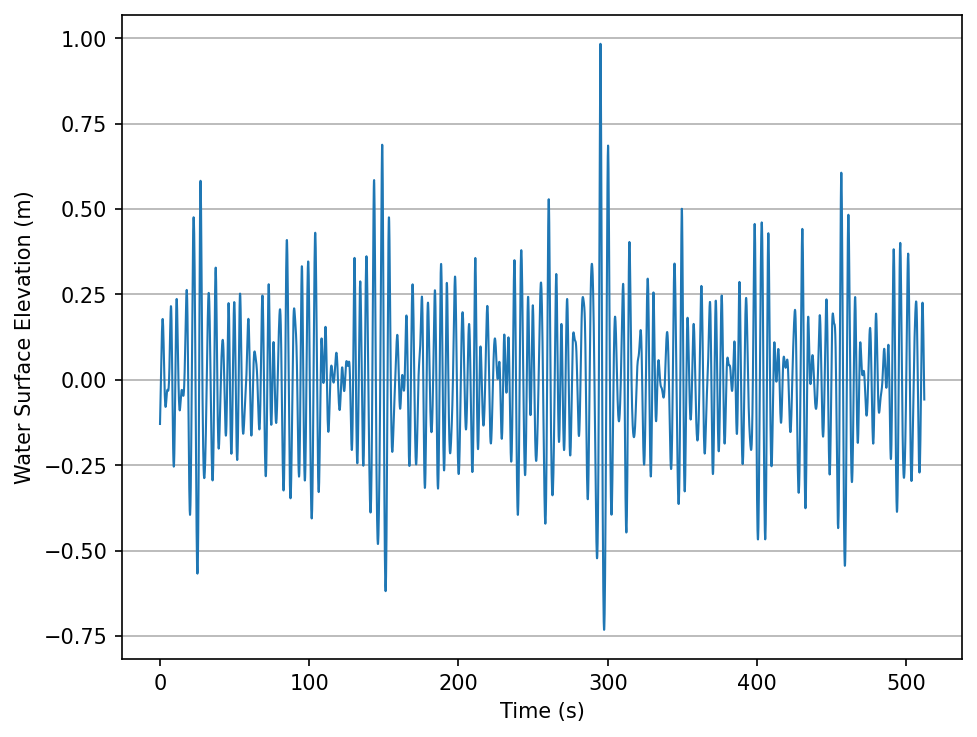

In [4]:
# Plot
fig1, ax1 = plt.subplots(layout='constrained', dpi=150)
ax1.plot(time, eta, linewidth=1)
ax1.set_xlabel('Time (s)');
ax1.set_ylabel('Water Surface Elevation (m)');
ax1.grid(axis='y');